In [47]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Develop data input

In [48]:
import h5py
import pandas as pd
csv_path = 'tambo/first_10k_rows.csv'
inputs_data = pd.read_csv(csv_path)
inputs_concatenated = inputs_data.values.reshape(-1, inputs_data.shape[-1])  # (concat_events*locations, 4)

# save names for inputs and labels
input_names = ["X_transformed", "Y_transformed", "kinetic_energy", "time"]

inputs = inputs_data[input_names]
print("Data has been successfully loaded")
print(f"Shape: {inputs.shape}")



Data has been successfully loaded
Shape: (10000, 4)


Text(0, 0.5, 'Y position')

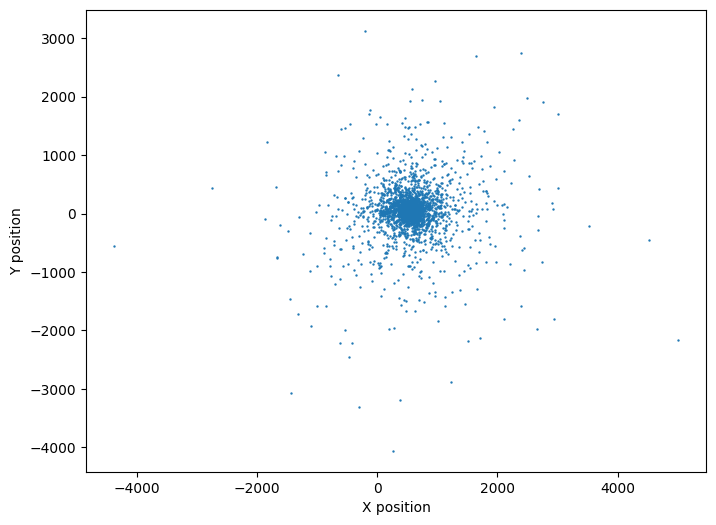

In [49]:
import matplotlib.pyplot as plt

variations_of_x_y = inputs.groupby(['X_transformed', 'Y_transformed']).size().reset_index(name='counts')    
len(variations_of_x_y)
plt.figure(figsize=(8,6))
plt.scatter(variations_of_x_y['X_transformed'], variations_of_x_y['Y_transformed'], s=0.5)
plt.xlabel('X position')
plt.ylabel('Y position')

In [50]:
# sum N for each time
input_times = inputs.groupby(['time']).agg({'kinetic_energy': 'sum'}).reset_index()

In [51]:
input_times.shape

(10000, 2)

## Test data input

In [52]:
from simulator import Simulator

In [53]:
simulator = Simulator(mountain_x=(-500,1000), mountain_y=(-500,500))

In [54]:
simulator.read_data(csv_path, drop_outliers=True)

Loading data from tambo/first_10k_rows.csv...
Outliers removed: keeping data between 1.0127577269077301 and 269.6305123901376 kinetic energy.
Data has been successfully loaded
Shape: (9800, 4)


## Test detector initialization

Random initialization completed.


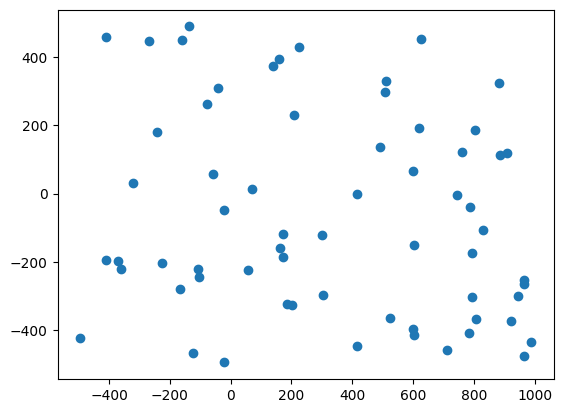

In [67]:
simulator.initialize_detectors()
plt.scatter(simulator.detectors_loc[:, 0], simulator.detectors_loc[:, 1])

In [68]:
# simulator.initialize_detectors(initialization_logic="uniform")
# plt.figure()
# plt.scatter(simulator.detectors_loc[:, 0], simulator.detectors_loc[:, 1])

## Particle detection

In [69]:
# simulator.inputs = simulator.inputs.sample(frac=0.01)

In [70]:
simulator.inputs.shape

(9800, 4)

In [71]:
simulator.calculate_detected_particles()

In [72]:
simulator.calculate_total_particles()

Calculated total particles for 9800 events


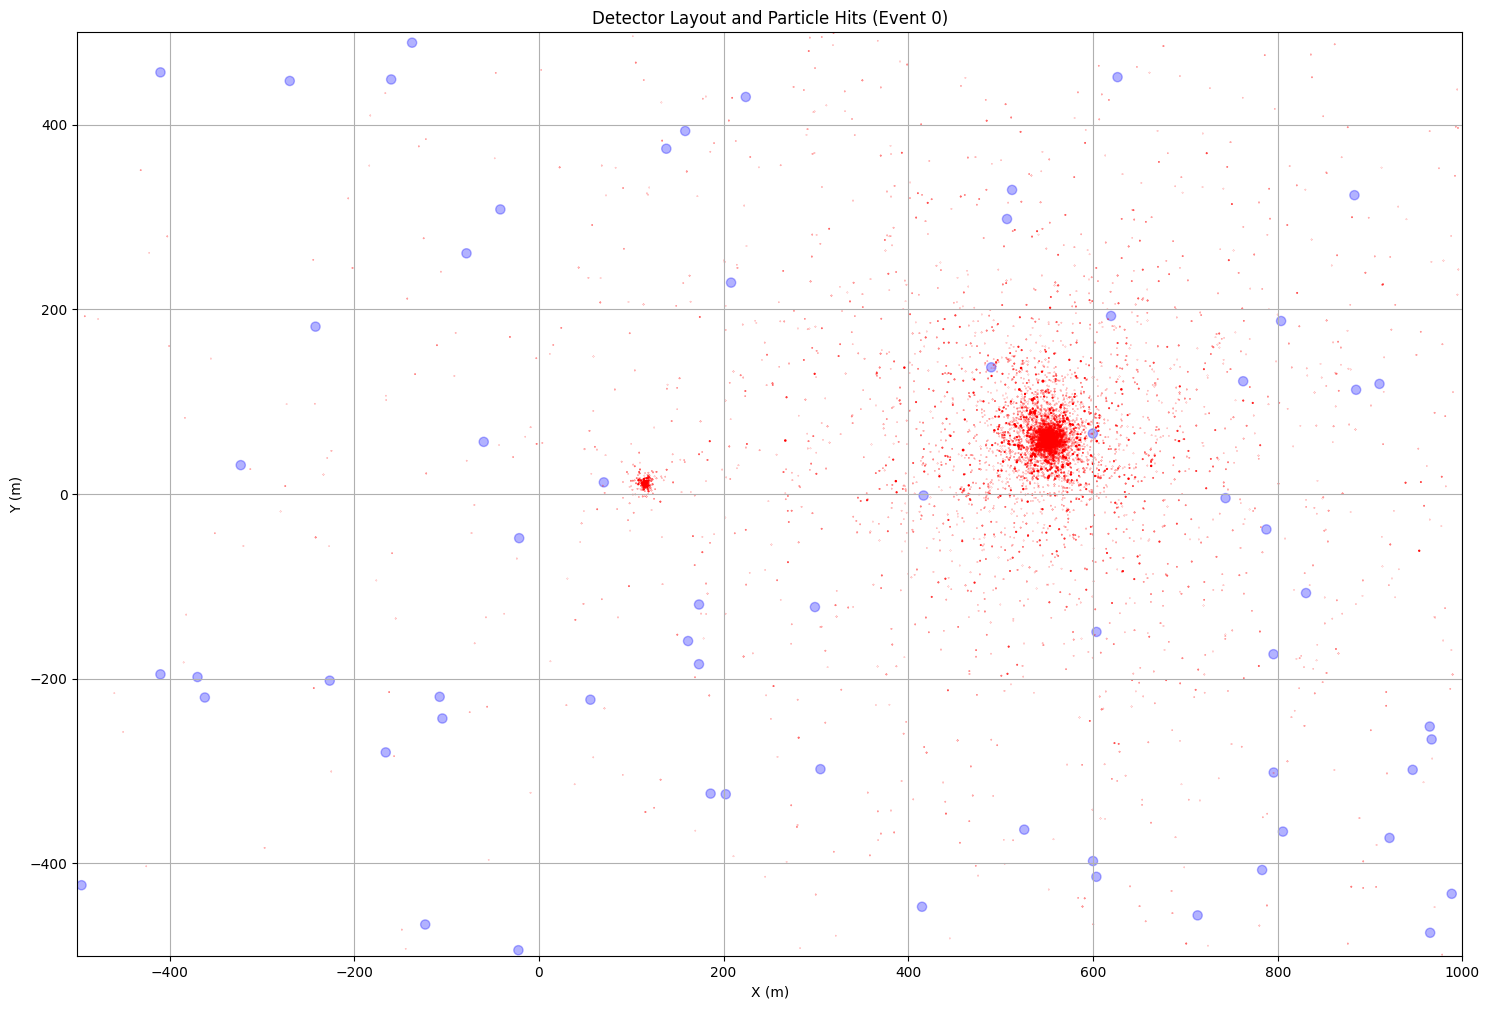

In [73]:
simulator.plot_detector_layout()

In [74]:
efficiency_history, location_history = simulator.optimize_setup_sgd(n_epochs=5)

Starting SGD optimization with learning rate 1, batch_size 1000
Initializing momentum terms...
Grouping events for batch processing...


SGD Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/5:   0%|          | 0/10 [00:00<?, ?it/s]

2116.861103535476
4367.702743475931
2551.316365144716
2462.639466527753
1494.1693449639647
915.2689396584469
736.2201477795438
866.6495794271411
459.50546792782364
449.03377281964106
Epoch 1/5, Loss: -2.694826, Efficiency: 0.5245


Epoch 2/5:   0%|          | 0/10 [00:00<?, ?it/s]

-6320.931270184688
5238.24560553055
1794.6215456194623
64.15749504410127
166.70044746191184
-278.01669304517924
466.76798414438764
-419.192900759936
289.76537168180107
-448.19764910280264
Epoch 2/5, Loss: -3.185772, Efficiency: 0.4854


Epoch 3/5:   0%|          | 0/10 [00:00<?, ?it/s]

-5730.2279695346415
5037.003642131869
504.256256145854
1141.6141630095872
-702.1345988734604
396.7287694345406
-561.0616463097097
897.6734449333264
-676.5105712366958
-61.24261181773511
Epoch 3/5, Loss: -2.462340, Efficiency: 0.4474


Epoch 4/5:   0%|          | 0/10 [00:00<?, ?it/s]

-6803.425445461019
5170.572439106395
1455.1443201795937
521.9201306804296
-156.29019447541162
-425.37864509366767
517.6863939893988
-584.4960836815338
423.78890687923536
-198.73327340758289
Epoch 4/5, Loss: -2.311650, Efficiency: 0.4579


Epoch 5/5:   0%|          | 0/10 [00:00<?, ?it/s]

-6378.104104474614
4896.921105233064
1600.3414906125781
-162.7148399173137
301.6362088925513
-510.3044436175686
882.7590706349372
-1136.5891233138386
814.0351404602902
-551.1683048596948
Epoch 5/5, Loss: -2.269395, Efficiency: 0.4569
SGD optimization completed. Best efficiency: 0.5245


In [75]:
import matplotlib.pyplot as plt
from celluloid import Camera

fig, ax = plt.subplots()
camera = Camera(fig)

for i in range(location_history.shape[0]):
    points = location_history[i, :, :]
    ax.scatter(simulator.inputs['X_transformed'], simulator.inputs['Y_transformed'], color='red', alpha=0.1, s=1)
    ax.scatter(points[:, 0], points[:, 1], color='C0')
    ax.set_xlim(-500, 1000)
    ax.set_ylim(-500, 500)
    camera.snap()
anim = camera.animate()
anim.save('test.mp4')

plt.close()

In [76]:
from IPython.display import Video

Video('test.mp4', embed=True)

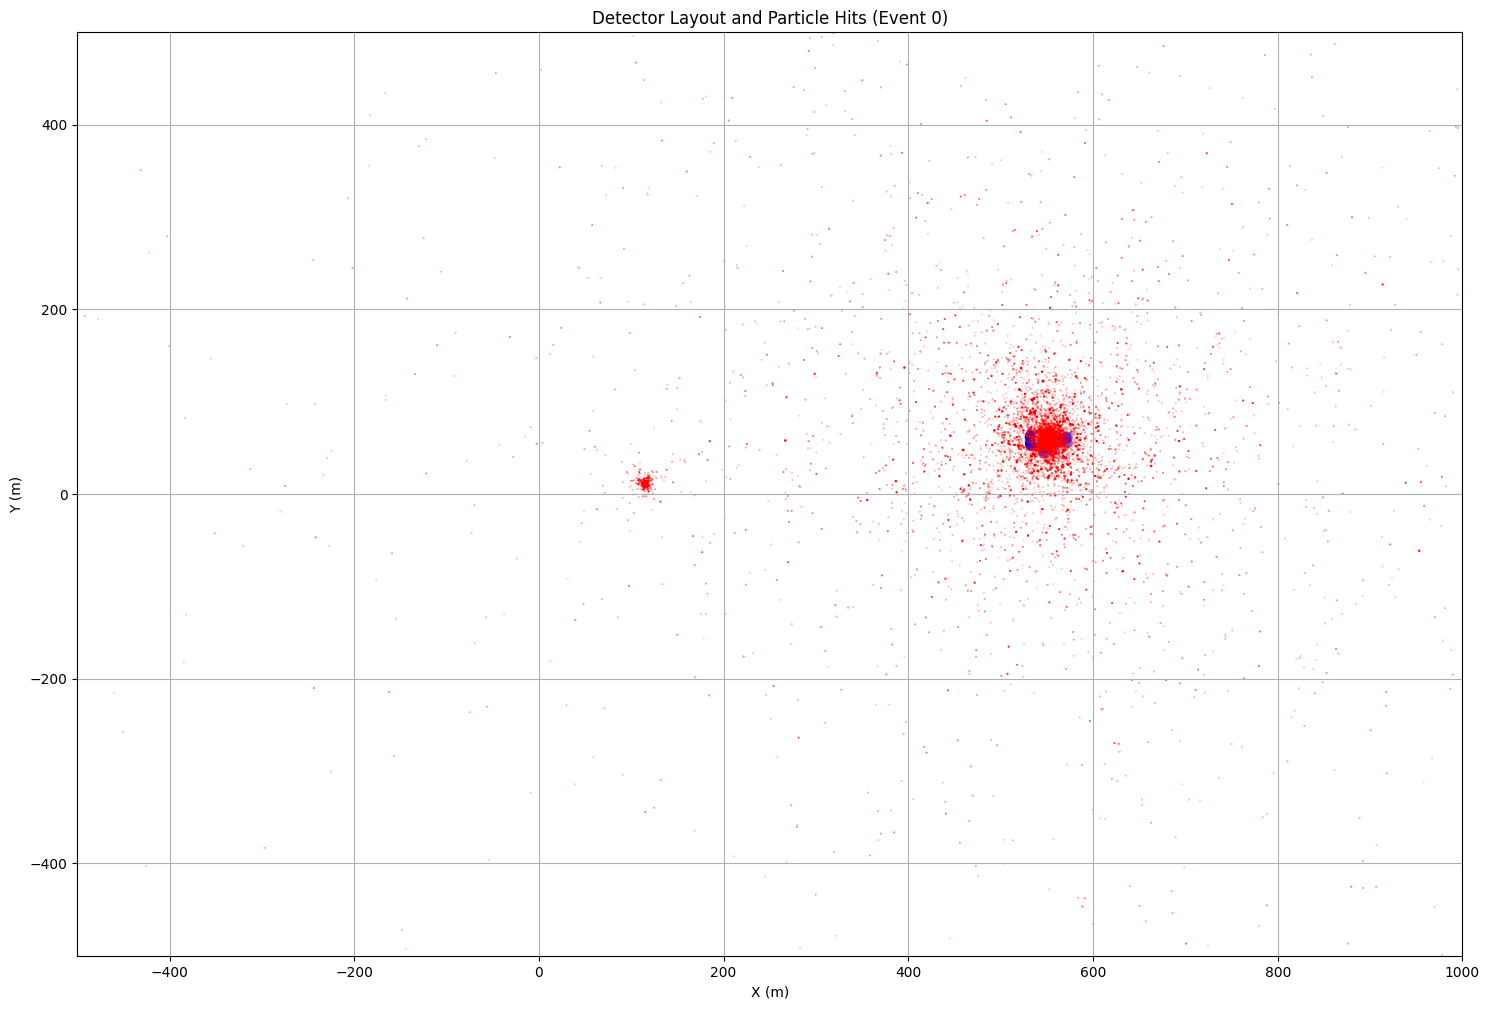

In [80]:
simulator.plot_detector_layout()